# Simulasi Mesin Cuci Industri Tekstil Berbasis Kendali Fuzzy dan Interface LabVIEW 2014

- __Nama : Fadilla Ramadhani__
- __NIM  : 09011281722061__
- __Kelas: SK5A__

    Penelitian berbasis laboratorium ini membangun sebuah sistem simulasi aplikasi mesin cuci yang dapat digunakan pada industri. Parameter simulasi untuk mengendalikan motor DC didasarkan pada tingkat kekotoran pakaian dan massa pakaian. Metoda kendali kecepatan pada motor DC yang dipilih dalam penelitian ini adalah Fuzzy Inference System. Implementasi metoda kendali pada motor DC memanfaatkan protokol VISA LabVIEW untuk menghubungkan sistem akuisisi data dan komputer. Sistem akuisisi data yang digunakan bebasis mikrokontroller AT91SAM3X8E dengan platform Arduino Due yang dilengkapi dengan sistem data logger. Hasil simulasi pada ke tiga tahapan dibandingkan untuk melihat performansi yang efektif digunakan untuk metoda kendali motor DC menggunakan Fuzzy Inference Systems

    Input terdiri dari 2 variabel yaitu Tingkat Kekotoran dan Massa, dimana setiap variabel akan disusun domain himpunan fuzzy berdasarkan domain tersebut, selanjutnya ditentukan fungsi keanggotaan dari masing-masing variabel.
   
  Untuk variabel input Tingkat Kekotoran memiliki 3 kriteria 
  - Kurang Kotor(1 - 50)
  - Kotor(20 - 80)
  - Sangat Kotor(50 - 100)
  
  variabel input Massa memiliki 3 kriteria fuzzy
  - Rendaht(1 - 5)
  - Sedang(2 - 8)
  - Berat(5 - 10)
  
   Untuk variabel output Kecepatan Motor memiliki 5 kriteria fuzzy 
  - Sangat Lambat(1 - 500)
  - Lambat(400 - 800)
  - Menengah(700 - 1000)
  - Cepat(800 - 1200)
  - Sangat Cepat(1100 - 1400)

# I. METODE FUZZY YANG DIGUNAKAN

Metode fuzzy yang digunakan adalah Mamdani. Langkah-langkah dalam metode mamdani, antara lain:  
1. Pembentukan Himpunan Fuzzy
2. Aplikasi Fungsi Implikasi
3. Komposisi Aturan
4. Defuzifikasi

# II. PENYELESAIAN DENGAN PYTHON

- Import Library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## A. Fuzzifikasi

Setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).

`Antecedent` adalah premis atau sebagai input, dan `consequent` adalah kesimpulan atau sebagai output. Dan angka-angka yang terdapat di dalam kurung merupakan batas-batas yang formatnya _**(batas awal, batas akhir, kelipatan)**_, selanjutnya batas tersebut diberi label dengan nama variabelnya.

| Variabel     | Himpunan      | 
|---------     |---------------|
|Tingkat       |  Kurang Kotor |     
|kekotoran     |   Kotor       |   
|              |  Sangat Kotor |  
|Massa         |   Ringan      |   
|              |   Sedang      |  
|              |   Berat       |
|Kecepatan     | Sangat Lambat | 
|Motor         |   Lambat      |   
|              |   Menengah    |   
|              |   Cepat       |  
|              | Sangat Cepat  |

### 1. Variabel Input

In [5]:
#input
Tingkat_kekotoran = ctrl.Antecedent(np.arange(0, 101, 1),'Tingkat kekotoran')
Massa = ctrl.Antecedent(np.arange(0, 11, 1),'Massa')

#untuk plot terpisah
TK = np.arange(0, 101, 1)
Massa1 = np.arange(0, 11, 1)

### 2. Variabel Ouput


In [6]:
#output
Kecepatan_motor = ctrl.Consequent(np.arange(0, 1401, 1),'Kecepatan motor')

#untuk plot terpisah
KM = np.arange(0, 1401, 1)

### 3. Nilai Linguistik

a. Nilai Linguistik pada Variabel Tingkat Kekotoran ada 3, yaitu:
- Kurang Kotor
$$ Kurang Kotor [x] = 
\begin{cases}
    \frac{(50-x)}{(50-1)} & ; 1 \leq  x \leq\ 50 \\
    0 & ; x \geq 50
\end{cases}
$$

- Kotor
$$ Orderan Cukup [x] = 
\begin{cases}
    0 & ; x \leq 1\\
    \frac{(x-1)}{(20-1)} & ;1 \leq x \leq\ 20 \\
    \frac{(80-x)}{(80-20)} & ; 20 \leq  x \leq\ 80 \\
    0 & ; x \geq 80
\end{cases}
$$

- Sangat Kotor
$$ Sangat Kotor [x] = 
\begin{cases}
    0 & ; x \leq 50\\
    \frac{(x-50)}{(100-50)} & ;50 \leq x \leq\ 100 \\
\end{cases}
$$

b. Nilai Linguistik pada Variabel Massa ada 3, yaitu:
- Rendah
$$ Rendah [x] = 
\begin{cases}
    \frac{(5-x)}{(5-1)} & ; 1 \leq  x \leq\ 5 \\
    0 & ; x \geq 5
\end{cases}
$$

- Sedang
$$ Sedang [x] = 
\begin{cases}
    0 & ; x \leq 3\\
    \frac{(x-2)}{(5-2)} & ; 2 \leq x \leq\ 5 \\
    \frac{(8-x)}{(8-5)} & ; 5 \leq  x \leq\ 8 \\
    0 & ; x \geq 5
\end{cases}
$$

- Berat
$$ Berat [x] = 
\begin{cases}
    0 & ; x \leq 10\\
    \frac{(x-5)}{(10-5)} & ; 5 \leq x \leq\ 10 \\
\end{cases}
$$

c. Nilai Linguistik pada Variabel Kecepatan Motor ada 5, yaitu:
- Sangat Lambat
$$ Sangat Lambat [z] = 
\begin{cases}
    \frac{(500-z)}{(500-1)} & ; 1 \leq  z \leq\ 500 \\
    0 & ; z \geq 500
\end{cases}
$$

- Lambat
$$ Lambat [z] = 
\begin{cases}
    0 & ; z \leq 400\\
    \frac{(z-400)}{(800-400)} & ; 400 \leq z \leq\ 620 \\
    \frac{(800-z)}{(800-620)} & ; 620 \leq  z \leq\ 800 \\
    0 & ; z \geq 800
\end{cases}
$$

- Menengah
$$ Menengah [z] = 
\begin{cases}
    0 & ; z \leq 620\\
    \frac{(z-650)}{(1000-650)} & ; 620 \leq z \leq\ 820 \\
    \frac{(1000-z)}{(1000-820)} & ; 820 \leq  z \leq\ 1000 \\
    0 & ; z \geq 1000
\end{cases}
$$

- Cepat
$$ Cepat [z] = 
\begin{cases}
    0 & ; z \leq 800\\
    \frac{(z-800)}{(1200-800)} & ; 800 \leq z \leq\ 1050 \\
    \frac{(1200-z)}{(1200-1050)} & ; 1050 \leq  z \leq\ 1200 \\
    0 & ; z \geq 1200
\end{cases}
$$

- Sangat Cepat
$$ Sangat Cepat [z] = 
\begin{cases}
    0 & ; z \leq 1100\\
    \frac{(z-1100)}{(1400-1100)} & ;1100 \leq z \leq\ 1400 \\
\end{cases}
$$

### 4. Membership Function 
- Membership function yang digunakan yaitu fungsi segitiga atau triangular (trimf).

#### Membership Function dari Tingkat Kekotoran (Variabel Input)
- Tingkat Kekotoran  : Kurang Kotor, Kotor, Sangat Kotor

In [7]:
Tingkat_kekotoran['Kurang Kotor'] = fuzz.trimf(Tingkat_kekotoran.universe, [1, 1, 50])
Tingkat_kekotoran['Kotor'] = fuzz.trimf(Tingkat_kekotoran.universe, [20, 50, 80])
Tingkat_kekotoran['Sangat Kotor'] = fuzz.trimf(Tingkat_kekotoran.universe, [50, 100, 100])

In [8]:
#plot terpisah
TK_kurangkotor = fuzz.trimf(TK, [1, 1, 50])
TK_kotor = fuzz.trimf(TK, [20, 50, 80])
TK_sangatkotor = fuzz.trimf(TK, [50, 100, 100])

#### Membership Function dari Massa (Variabel Input)
- Massa : Ringan, Sedang, Berat

In [9]:
Massa['Ringan'] = fuzz.trimf(Massa.universe, [1, 1, 5])
Massa['Sedang'] = fuzz.trimf(Massa.universe, [2, 5, 8])
Massa['Berat'] = fuzz.trimf(Massa.universe, [5, 10, 10])

In [10]:
#plot terpisah
Massa1_Ringan = fuzz.trimf(Massa1, [1, 1, 5])
Massa1_Sedang = fuzz.trimf(Massa1, [2, 5, 8])
Massa1_Berat = fuzz.trimf(Massa1, [5,10, 10])

#### Membership Function dari Kecepatan Motor (Variabel Output)
- Kecepatan Motor : Sangat Lambat, Lambat, Menengah, Cepat, Sangat Cepat

In [11]:
Kecepatan_motor['Sangat lambat'] = fuzz.trimf(Kecepatan_motor.universe, [1, 1, 500])
Kecepatan_motor['Lambat'] = fuzz.trimf(Kecepatan_motor.universe, [400, 620, 800])
Kecepatan_motor['Menengah'] = fuzz.trimf(Kecepatan_motor.universe, [700, 820, 1000])
Kecepatan_motor['Cepat'] = fuzz.trimf(Kecepatan_motor.universe, [800, 1020, 1200])
Kecepatan_motor['Sangat cepat'] = fuzz.trimf(Kecepatan_motor.universe, [1100, 1400, 1400])

In [12]:
#plotterpisah
KM_Sangatlambat = fuzz.trimf(KM, [1, 1, 500])
KM_Lambat = fuzz.trimf(KM, [400, 620, 800])
KM_Menengah = fuzz.trimf(KM, [700, 820, 1000])
KM_Cepat = fuzz.trimf(KM, [800, 1020, 1200])
KM_Sangatcepat = fuzz.trimf(KM, [1100, 1400, 1400])

### Menampilkan Grafik Masing-masing Himpunan Fuzzy

#### Menampilkan Grafik fungsi keanggotaan dari Tingkat Kekotoran

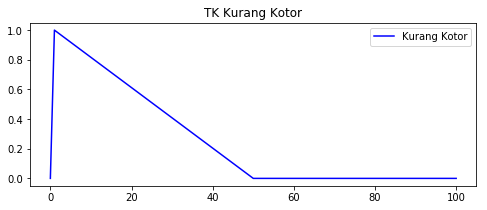

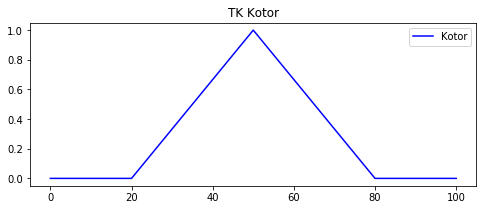

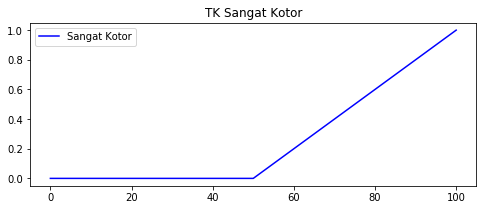

In [13]:
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(TK, TK_kurangkotor, 'b', linewidth=1.5, label='Kurang Kotor')
ax0.set_title('TK Kurang Kotor')
ax0.legend()

fig, (ax1) = plt.subplots(nrows=1, figsize=(8, 3))

ax1.plot(TK, TK_kotor, 'b', linewidth=1.5, label='Kotor')
ax1.set_title('TK Kotor')
ax1.legend()

fig, (ax2) = plt.subplots(nrows=1, figsize=(8, 3))

ax2.plot(TK, TK_sangatkotor, 'b', linewidth=1.5, label='Sangat Kotor')
ax2.set_title('TK Sangat Kotor')
ax2.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


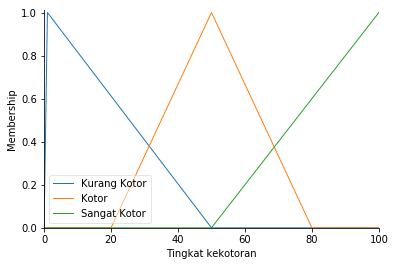

In [14]:
Tingkat_kekotoran.view()

#### Menampilkan Grafik fungsi keanggotaan dari Tingkat Massa

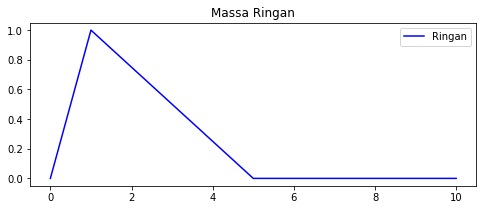

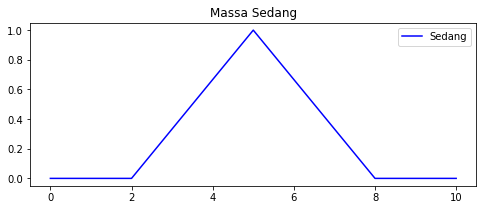

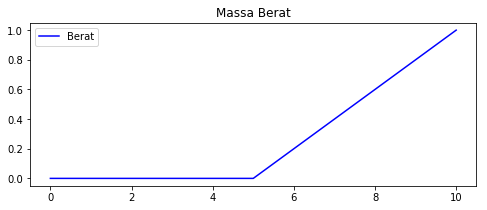

In [15]:
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(Massa1, Massa1_Ringan, 'b', linewidth=1.5, label='Ringan')
ax0.set_title('Massa Ringan')
ax0.legend()

fig, (ax1) = plt.subplots(nrows=1, figsize=(8, 3))

ax1.plot(Massa1, Massa1_Sedang, 'b', linewidth=1.5, label='Sedang')
ax1.set_title('Massa Sedang')
ax1.legend()

fig, (ax2) = plt.subplots(nrows=1, figsize=(8, 3))

ax2.plot(Massa1, Massa1_Berat, 'b', linewidth=1.5, label='Berat')
ax2.set_title('Massa Berat')
ax2.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


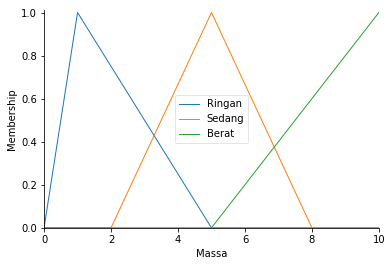

In [16]:
Massa.view()

#### Menampilkan Grafik fungsi keanggotaan dari Tingkat Kekotoran

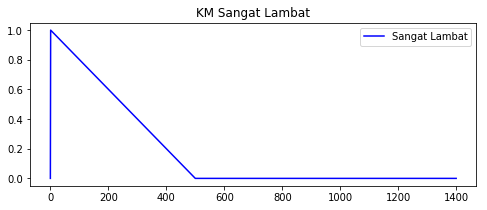

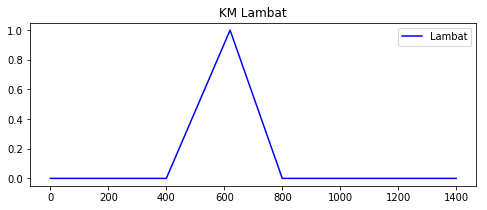

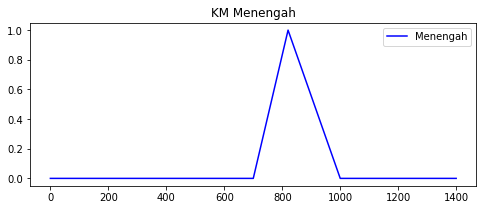

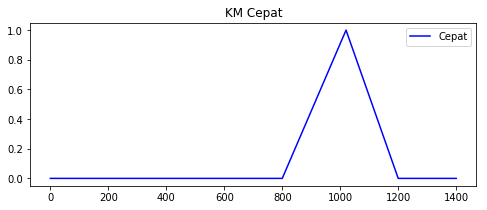

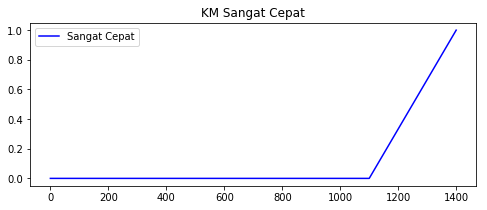

In [17]:
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(KM, KM_Sangatlambat, 'b', linewidth=1.5, label='Sangat Lambat')
ax0.set_title('KM Sangat Lambat')
ax0.legend()

fig, (ax1) = plt.subplots(nrows=1, figsize=(8, 3))

ax1.plot(KM, KM_Lambat, 'b', linewidth=1.5, label='Lambat')
ax1.set_title('KM Lambat')
ax1.legend()

fig, (ax2) = plt.subplots(nrows=1, figsize=(8, 3))

ax2.plot(KM, KM_Menengah, 'b', linewidth=1.5, label='Menengah')
ax2.set_title('KM Menengah')
ax2.legend()

fig, (ax3) = plt.subplots(nrows=1, figsize=(8, 3))

ax3.plot(KM, KM_Cepat, 'b', linewidth=1.5, label='Cepat')
ax3.set_title('KM Cepat')
ax3.legend()

fig, (ax4) = plt.subplots(nrows=1, figsize=(8, 3))

ax4.plot(KM, KM_Sangatcepat, 'b', linewidth=1.5, label='Sangat Cepat')
ax4.set_title('KM Sangat Cepat')
ax4.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


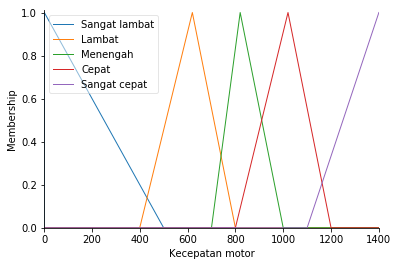

In [18]:
Kecepatan_motor.view()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel Tingkat Kekotoran yang berjumlah 3 dan fuzzifikasi dari variabel Massa yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

1. IF Tingkat Kekotoran 'Kurang Kotor' AND Massa 'Ringan' THEN Kecepatan Motor 'Lambat'
2. IF Tingkat Kekotoran 'Kurang Kotor' AND Massa 'Sedang' THEN Kecepatan Motor 'Menengah'
3. IF Tingkat Kekotoran 'Kurang Kotor' AND Massa 'Berat' THEN Kecepatan Motor 'Menengah'

4. IF Tingkat Kekotoran 'Kotor' AND Massa 'Ringan' THEN Kecepatan Motor 'Menengah'
5. IF Tingkat Kekotoran 'Kotor' AND Massa 'Sedang' THEN Kecepatan Motor 'Menengah'
6. IF Tingkat Kekotoran 'Kotor' AND Massa 'Berat' THEN Kecepatan Motor 'Cepat'

7. IF Tingkat Kekotoran 'Sangat Kotor' AND Massa 'Ringan' THEN Kecepatan Motor 'Menengah'
8. IF Tingkat Kekotoran 'Sangat Kotor' AND Massa 'Sedang' THEN Kecepatan Motor 'Cepat'
9. IF Tingkat Kekotoran 'Sangat Kotor' AND Massa 'Berat' THEN Kecepatan Motor 'Sangat Cepat'

## Rule Base

In [19]:
#membuat rule untuk menentukan Kecepatan Motor 
rule1 = ctrl.Rule(Tingkat_kekotoran["Kurang Kotor"] & Massa["Ringan"], Kecepatan_motor["Lambat"])
rule2 = ctrl.Rule(Tingkat_kekotoran["Kurang Kotor"] & Massa["Sedang"], Kecepatan_motor["Menengah"])
rule3 = ctrl.Rule(Tingkat_kekotoran["Kurang Kotor"] & Massa["Berat"], Kecepatan_motor["Menengah"])

rule4 = ctrl.Rule(Tingkat_kekotoran["Kotor"] & Massa["Ringan"], Kecepatan_motor["Menengah"])
rule5 = ctrl.Rule(Tingkat_kekotoran["Kotor"] & Massa["Sedang"], Kecepatan_motor["Menengah"])
rule6 = ctrl.Rule(Tingkat_kekotoran["Kotor"] & Massa["Berat"], Kecepatan_motor["Cepat"])

rule7 = ctrl.Rule(Tingkat_kekotoran["Sangat Kotor"] & Massa["Ringan"], Kecepatan_motor["Menengah"])
rule8 = ctrl.Rule(Tingkat_kekotoran["Sangat Kotor"] & Massa["Sedang"], Kecepatan_motor["Cepat"])
rule9 = ctrl.Rule(Tingkat_kekotoran["Sangat Kotor"] & Massa["Berat"], Kecepatan_motor["Sangat cepat"])

# RULE EVALUATION

In [20]:
simulasi_Kecepatan_motor = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# DEFUZZIFIKASI

In [21]:
prediksi_Kecepatan_motor = ctrl.ControlSystemSimulation(simulasi_Kecepatan_motor)

Input Tingkat kekotoran dimasukan 20 dan Massa 2

In [22]:
prediksi_Kecepatan_motor.input['Tingkat kekotoran'] = 20
prediksi_Kecepatan_motor.input['Massa'] = 2

In [23]:
#perhitungan defuzzifikasi
prediksi_akhir = prediksi_Kecepatan_motor.compute()
prediksi_akhir = prediksi_Kecepatan_motor.output['Kecepatan motor']

#mencetak hasil output defuzzifikasi
print ("Perhitungan hasil komputasi = %.3f" % prediksi_akhir)

Perhitungan hasil komputasi = 605.222


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


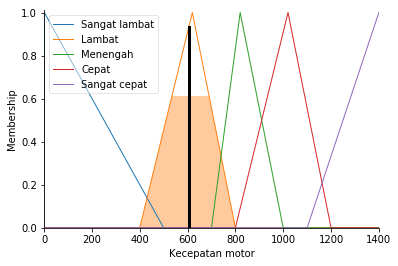

In [24]:
Kecepatan_motor.view(sim = prediksi_Kecepatan_motor)

# Perhitungan Manual

\begin{equation}
    Tingkat_kekotoran = 20 \\
    Masukkan\,nilai\,Tingkat kekotoran\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Tingkat_kekotoran\\
  Tingkat kekotoran['Kurang Kotor'] = \mu Kurang kotor(x)=\begin{cases}
    1, & \text{$x\leq50$}.\\
    (50 - x)/(50 - 1) , & \text{$1 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.\checkmark
  \end{cases}
  \\
  Tingkat kekotoran['Kotor'] = \mu Kotor(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq80$}. \checkmark \\
    (x - 20)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\\
    (80 - x)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
  \end{cases}
  \\
    Tingkat kekotoran['Sangat kotor'] = \mu Sangat kotor(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 \leq x \leq 100$}.\checkmark\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu Kurang kotor(20) = (50 - 20) / (50 - 1) \\
    \mu Kurang kotor(20) = 30/49 \\ 
    \mu Kurang kotor(20) = 0.61 \\
    \mu Kotor(20) = (20 - 20) / (50 - 20) \\
    \mu Kotor(20) = 0/30 \\
    \mu Kotor(20) = 0 \\
\end{equation}

\begin{equation}
   Massa = 2 \\
  Massa['Ringan'] = \mu Ringan(x)=\begin{cases}
    1, & \text{$0\leq x \leq 1$}. \checkmark \\ 
    \left.(5 - x) \,  \right/(5 - 1) , & \text{$1 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5$}.
  \end{cases}
  \\
    Massa['Sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 2$ atau $x\geq 8$}.\checkmark\\
    \left.(x - 2)\, \right/(5 - 2) , & \text{$2 \leq x \leq 5$}.\\
    \left.(8 - x)\, \right/(8 - 5) , & \text{$5 \leq x \leq 82$}.\\
  \end{cases}
  \\
  Massa['Berat'] = \mu Berat(x)=\begin{cases}
    0, & \text{$x \leq 5$}.\checkmark\\
    \left.(x - 5) \,  \right/(10 - 5) , & \text{$5 \leq x \leq 10$}.\\
    1, & \text{$x\geq 10$}.
  \end{cases}
\end{equation}

\begin{equation}
    \mu Ringan(2) = (5 - 2) / (5 - 1) \\
    \mu Ringan(2) = 3/4 \\ 
    \mu Ringan(2) = 0.75 \\
    \mu Sedang(2) = (2 - 2) / (5 - 2) \\
    \mu Sedang(2) = 0/3 \\
    \mu Sedang(2) = 0 \\
\end{equation}

## Perhitungan
- Mencari Nilai a

$$
0,6 = \frac{a - 400}{600 - 400}
$$

$$
0,6 x 200 = a - 400
$$

$$
a = 520
$$

- Mencari nilai b

$$
0,6 = \frac{800 - b}{800 - 600}
$$

$$
0,6 x 200 = 800 - b
$$

$$
b = 680
$$

- Menghitung X1 X2 dan X3

$$
X1 = 400 + \frac{2 x (520 - 400)}{3}  
$$

$$
= 480
$$

$$
X2 = \frac{(520 + 680)}{2}  
$$

$$
= 600
$$

$$
X3 = 680 + \frac{(800 - 680)}{3}  
$$

$$
= 720
$$

- Menghitung luas area (A)

$$
A1 = \frac{(520 - 400) x 0.6}{2}  
$$

$$
= 36
$$

$$
A2 = (680 - 520) x 0.6  
$$

$$
= 96
$$

$$
A3 = \frac{(800 - 680) x 0.6}{2}  
$$

$$
= 36
$$

#### Dari sini kita dapat mencari nilai defuzzifikasi, yaitu :

$$
Z^* = \frac{(X1 x A1) + (X2 x A2) + (X3 x A3)}{A1 + A2 A3}
$$

$$
= \frac{(480 x 36) + (600 x 96) + (720 x 36)}{36 + 96 + 36}
$$

$$
= \frac{17280 + 57600 + 25920}{168}
$$

$$
= 600
$$

Hasil output yang dikeluarkan menggunakan code python sebesar 605.222 sedangkan perhitungan manual sebesar 600 .
Terdapat perbedaan sebesar 5.222